# Modelos de regresion linea
* y= a+b*x
* x: 100 valores distribuidos segun una N(1.5,2.5) N(media,Dev Estandar)
* Ye= 2 + 0.3*X
* Ye   12 +3.1X + e
* e Estará distribuido con una N(0, 0.8) 

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
x=  1.5 + 2.5 *  np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred= 5 + 1.9 *x
y_act= 5+1.9 * x + res
x_list= x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()
data=pd.DataFrame(
    {
        'x' : x_list,
        'y_actual' : y_act_list,
        'y_pred'  : y_pred_list
    
    }
)
data.head()

,x,y_actual,y_pred
0,6.512794,17.095348,17.374309
1,2.303119,9.838728,9.375927
2,-3.258766,-0.645354,-1.191656
3,3.491012,11.664337,11.632923
4,3.085451,11.217742,10.862357


In [145]:

y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]


Text(0.5, 1.0, 'Valor actual vs Prediccion')

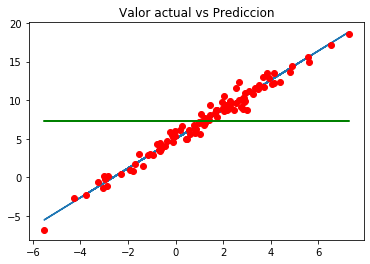

In [146]:
plt.plot(x,y_pred)
plt.plot(x,y_act, 'ro')
plt.plot(x,y_mean, 'g')
plt.title('Valor actual vs Prediccion')


In [147]:
y_m=np.mean(data['y_actual'])
data['SSR']=(data['y_pred']-y_m)**2
data['SSD']=(data['y_pred']-data['y_actual'])**2
data['SST']=(data['y_actual']-y_m)**2
data.head()



,x,y_actual,y_pred,SSR,SSD,SST
0,6.512794,17.095348,17.374309,100.575989,0.077819,95.058539
1,2.303119,9.838728,9.375927,4.122427,0.214185,6.215933
2,-3.258766,-0.645354,-1.191656,72.883897,0.298445,63.854563
3,3.491012,11.664337,11.632923,18.381562,0.000987,18.651916
4,3.085451,11.217742,10.862357,12.367929,0.126298,14.993868


In [148]:
SSR=sum(data['SSR'])
SSD=sum(data['SSD'])
SST=sum(data['SST'])


In [149]:
SST

2093.2139532111073

In [150]:
SSD

53.57826622494264

In [151]:
SSR

2076.2015447574277

In [152]:
SSR+SSD

2129.7798109823702

In [153]:
R2=SSR/SST

In [154]:
R2

0.9918725897906511

(array([ 1.,  3.,  7.,  7., 26., 26., 18.,  8.,  3.,  1.]),
 array([-2.29327168, -1.86200536, -1.43073904, -0.99947272, -0.56820641,
        -0.13694009,  0.29432623,  0.72559255,  1.15685887,  1.58812518,
         2.0193915 ]),
 <a list of 10 Patch objects>)

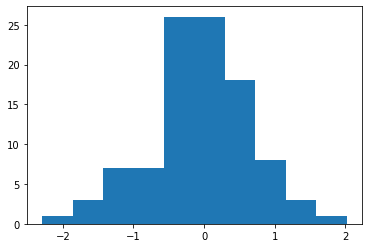

In [155]:
plt.hist(data['y_pred']-data['y_actual'])

In [156]:
x_mean=np.mean(data['x'])
y_mean2=np.mean(data['y_actual'])

In [157]:
# Data covarianza
data['beta_n'] = (data['x']-x_mean)*(data['y_actual']-y_mean2)
# Data Varianza
data['beta_d'] = (data['x']-x_mean)**2


In [158]:
beta=sum(data['beta_n'])/sum(data['beta_d'])
alpha=y_mean2-beta*x_mean


## El Modelo lineal obtenido por regresion lineal es:
* Y= a+b*X

In [159]:
alpha,beta

(5.083003183286001, 1.883632717135352)

In [160]:
data['y_model']=alpha +beta*data['x']
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,6.512794,17.095348,17.374309,100.575989,0.077819,95.058539,51.787337,28.213439,17.350715
1,2.303119,9.838728,9.375927,4.122427,0.214185,6.215933,2.747376,1.214310,9.421234
2,-3.258766,-0.645354,-1.191656,72.883897,0.298445,63.854563,35.638861,19.890958,-1.055316
3,3.491012,11.664337,11.632923,18.381562,0.000987,18.651916,9.889375,5.243415,11.658788
4,3.085451,11.217742,10.862357,12.367929,0.126298,14.993868,7.296330,3.550547,10.894860


In [161]:
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]

SSR=sum((data['y_model']-np.mean(data['y_actual']))**2)
SSD=sum((data['y_model']-data['y_actual'])**2)
SST=sum((data['y_actual']-y_mean)**2)

In [162]:
SSR, SSD, SST

(2040.1909652936924, 53.02298791741819, 2093.2139532111078)

In [163]:
R2= SSR/SST
R2


0.9746691025845327

Text(0.5, 1.0, 'Valor actual vs Prediccion')

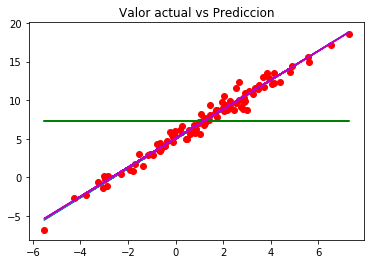

In [164]:
plt.plot(data['x'],data['y_pred'])
plt.plot(data['x'],data['y_actual'], 'ro')
plt.plot(data['x'],y_mean, 'g')
plt.plot(data['x'],data['y_model'], 'm')
plt.title('Valor actual vs Prediccion')

In [165]:
# Calcular el Error estandar de los residuos
RSE=np.sqrt(SSD/(len(data)-2))
RSE

0.7355616202035776

In [166]:
# Porcentaje del RSE
RSE/np.mean(data['y_actual'])

0.1001370281169531